In [1]:
from dreye.core import Spectrum, SpectrumMeasurement, \
    MeasuredSpectrum, convert_measurement, CalibrationSpectrum, \
    AbstractSpectrum, Signal, Domain
from dreye.constants import UREG
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(10)

In [2]:
from dreye.core import create_gaussian_spectrum

In [3]:
from dreye.core import create_spectrum_measurement, create_measured_spectrum

In [4]:
from dreye.utilities import is_listlike

In [5]:
wl = np.arange(300, 600)
s = norm.pdf(wl, 450, 10)
s /= np.sum(s)
noise = 0.01
s_noise = s + np.random.normal(0, noise, size=s.shape)

In [6]:
gaussians = create_gaussian_spectrum(
    wl, 
    [340, 440, 540], 
    intensity=0.5, 
    background=np.ones(wl.shape), 
    add_background=True, 
    cdf=False,
    filter=True,
)

C:\Users\2P\Anaconda3\envs\dreye\lib\site-packages\pint\quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


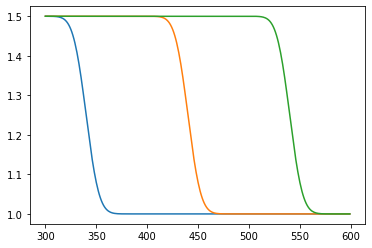

In [7]:
plt.plot(
    gaussians.domain, gaussians, 
)

In [8]:
s2 = norm.pdf(wl[:, None], [300, 400, 500], 10)

In [9]:
s2.shape

(300, 3)

In [10]:
np.arange(100).reshape(10, 10).mean(0)[None]

array([[45., 46., 47., 48., 49., 50., 51., 52., 53., 54.]])

In [11]:
cal = CalibrationSpectrum(
    np.ones(wl.shape), 
    wl, 
    area=1
)

In [12]:
float(np.array([1]))

1.0

In [13]:
meas3 = create_measured_spectrum(
    np.arange(1, 10)[None, :] * norm.pdf(wl, 400, 10)[:, None], 
    np.arange(1, 10), 
    wl, 
    calibration=cal, 
    integration_time=1, 
)

In [15]:
signal = AbstractSpectrum(
    s_noise, wl
)

In [16]:
measurement2 = convert_measurement(
    AbstractSpectrum(
        s, wl
    ), cal, 1
).uE

for i in np.arange(2, 10):
    m = convert_measurement(
        AbstractSpectrum(
            i * s, 
            wl
        ),
        cal, 1
    ).irradiance
    
    measurement2 = measurement2.concat(
        m, 
    )

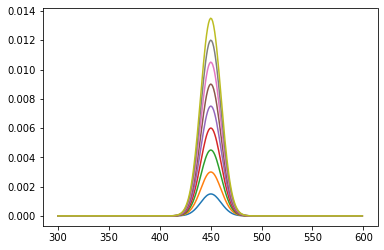

In [17]:
plt.plot(measurement2.domain, measurement2)

In [18]:
measurement = convert_measurement(
    signal, cal, 1
).uE

for i in np.arange(2, 10):
    m = convert_measurement(
        AbstractSpectrum(
            i * s + np.random.normal(0, noise, size=s.shape), 
            wl
        ),
        cal, 1
    ).irradiance
    
    measurement = measurement.concat(
        m, 
    )

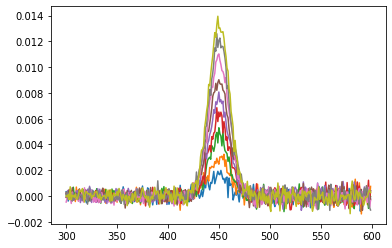

In [19]:
plt.plot(measurement.domain, measurement)

In [20]:
measured_spectrum = MeasuredSpectrum(
    measurement,
    labels=Domain(np.arange(1, 10), units='volts'), 
    smoothing_window=25, 
)

In [21]:
measured_spectrum2 = MeasuredSpectrum(
    measurement2,
    labels=Domain(np.arange(1, 10), units='volts'), 
    smoothing_window=25, 
)

In [22]:
spm = measured_spectrum.to_spectrum_measurement(
    name='LED',
    zero_boundary=0
)

print(spm.interpolator_kwargs)
print(spm)
print(spm.domain)

y_points = [0, 0.06, 0.1, 0.2]
x_points = spm.map(y_points)

{'bounds_error': False, 'fill_value': 'extrapolate', 'axis': 0}
[0.04120455 0.07192294 0.10227126 0.15538395 0.19004821 0.21804994 0.25703302 0.29903963 0.33008348] microE_Q
Domain(start=1.0, end=9.0, interval=1.0, units=volt, dtype=float64)


In [23]:
x_points

array([0.        , 1.61186306, 2.92516022, 5.35539909]) <Unit('volt')>

In [24]:
spm.domain_bounds

(0, 9.0)

In [25]:
msp = measured_spectrum.smooth

/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


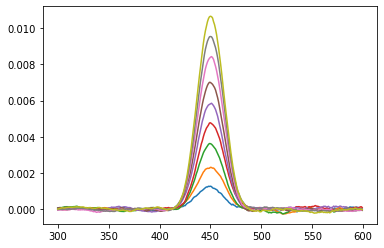

In [26]:
plt.plot(msp.domain, msp)


In [27]:
spm2 = msp.to_spectrum_measurement(
    name='LED',
    zero_boundary=0
)

x_points2 = spm2.map(y_points)

In [28]:
spm2.zero_boundary

0

In [29]:
spm3 = measured_spectrum2.to_spectrum_measurement(
    name='LED',
    zero_boundary=0
)
x_points3 = spm3.map(y_points)

/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


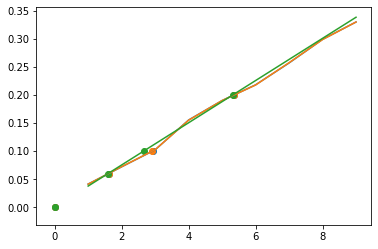

In [30]:
plt.scatter(x_points, y_points)
plt.plot(spm.domain, spm)
plt.scatter(x_points2, y_points)
plt.plot(spm2.domain, spm2)
plt.scatter(x_points3, y_points)
plt.plot(spm3.domain, spm3)

In [31]:
for idx, led in enumerate([300, 360, 400, 500]):
    
    s2 = norm.pdf(wl, led, 20)
    mess = convert_measurement(
        AbstractSpectrum(
            s2 + np.random.normal(0, noise, size=s.shape), 
            wl
        ), cal, 1
    ).uE

    for i in np.arange(2, 10):
        m = convert_measurement(
            AbstractSpectrum(
                i * s2 + np.random.normal(0, noise, size=s.shape), 
                wl
            ),
            cal, 1
        ).irradiance

        mess = mess.concat(
            m, 
        )

    ms = MeasuredSpectrum(
        mess,
        labels=Domain(np.arange(1, 10), units='volts'), 
        smoothing_window=25, 
    ).to_spectrum_measurement(
        name=f'LED{led}'
        zero_boundary=0
    )
        
    if idx == 0:
        mss = ms
    else:
        mss = mss.concat(ms)

In [32]:
mss.shape

(9, 4)

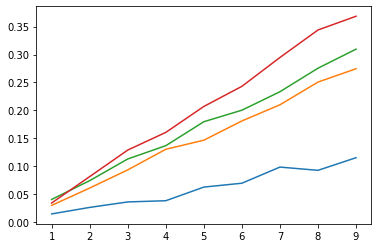

In [33]:
plt.plot(mss.domain, mss)

In [34]:
from dreye.core import LogPhotoreceptor, \
    RelativeOpsinSensitivity, Spectrum, Domain
from scipy.stats import norm

In [35]:
wl = np.arange(300, 600)
ops = norm.pdf(wl, 433, 40)

In [36]:
opsin = RelativeOpsinSensitivity(
    ops, 
    domain=wl, 
)

In [37]:
pr = LogPhotoreceptor(opsin)



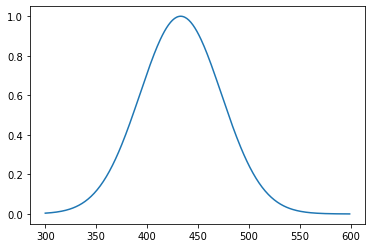

In [38]:
plt.plot(opsin.domain, opsin)

In [39]:
ill = norm.pdf(wl, 400, 80)
bg = np.ones(wl.shape)
bg /= np.sum(bg) * 100

In [40]:
illuminant = Spectrum(
    ill, 
    domain=wl
).uE
background = Spectrum(
    bg, 
    domain=wl
).uE

In [41]:
background.integral, illuminant.integral

(0.037450014891065905 <Unit('microspectral_E_Q * nanometer')>,
 3.079007145242771 <Unit('microspectral_E_Q * nanometer')>)

In [42]:
targets, A = pr.get_qs(
    mss, 
    illuminant/20, 
    background=background, 
)

In [43]:
bg_weights, bg_res, bg_new = mss.fit(
    background, return_fit=True, return_res=True
)

In [44]:
bg_weights

array([0.00227686, 0.0042431 , 0.00682931, 0.00949245]) <Unit('microE_Q')>

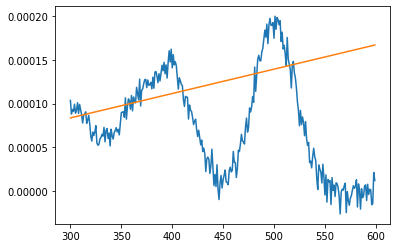

In [45]:
plt.plot(bg_new.domain, bg_new)
plt.plot(background.domain, background)

In [46]:
print(A)

[[-4.56136051e-03  2.02692683e+01  5.60558505e+01  2.31543996e+01]] / microspectral_E_Q / nanometer


In [47]:
w, res = pr.fit(
    mss, 
    illuminant/10 +  background, 
    background=background, 
    return_res=True, 
)

(1, 4) (1,)
(1, 4) (1,)


In [48]:
res

array([ active_mask: array([0, 0, 0, 0])
        cost: 0.0
         fun: array([0.])
        grad: array([0., 0., 0., 0.])
         jac: array([[-3.42637300e-04,  1.52261484e+00,  4.21088055e+00,
         1.73934409e+00]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 1
        njev: 1
  optimality: 0.0
      status: 1
     success: True
           x: array([0.10133704, 0.09135914, 0.1667169 , 0.09135914])],
      dtype=object)

In [49]:
w.shape

(1, 4)

In [50]:
mss.units

<Unit('microE_Q')>

In [51]:
print(w)

[[0.10133704 0.09135914 0.1667169  0.09135914]] microspectral_E_Q * nanometer


In [52]:
mss.bounds

[array([0., 0., 0., 0.]),
 array([0.11547341, 0.27457168, 0.30958498, 0.36842879])]

In [53]:
map_values = np.random.random(
    (100, mss.shape[mss.other_axis])
) * mss.bounds[1][None, :]

In [54]:
mapped = mss.map(map_values, method='isotonic')

In [55]:
xmss = mss.map(w, top=10)
print(xmss)

[[8.28123079 2.926938   4.69374882 2.20297008]] volt


/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


In [56]:
mss_smooth = mss.window_filter(
    3, 'savgol', polyorder=2
)
type(mss_smooth)

/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


dreye.core.spectral_measurement.SpectrumMeasurement

In [57]:
xmss2 = mss_smooth.map(w)
print(xmss2)

[[8.28123079 2.926938   4.69374882 2.20297008]] volt


/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


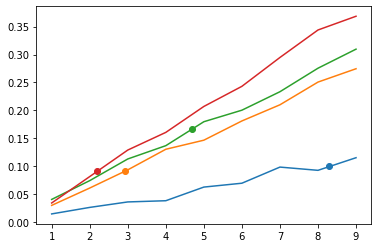

In [58]:
plt.plot(mss.domain, mss)

for ixms, iw in zip(np.squeeze(xmss), np.squeeze(w)):
    plt.scatter(
        ixms, iw, 
    )

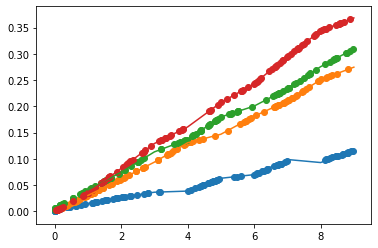

In [59]:
plt.plot(mss.domain, mss)

for ixms, iw in zip(mapped.T, map_values.T):
    plt.scatter(
        ixms, iw, 
    )

In [60]:
mss.bounds

[array([0., 0., 0., 0.]),
 array([0.11547341, 0.27457168, 0.30958498, 0.36842879])]

In [61]:
mss.domain_bounds

(0, 9.0)

In [62]:
opsin2 = RelativeOpsinSensitivity(
    norm.pdf(wl[:,None], np.array([[330, 450, 560]]), 40),
    domain=wl, 
)

In [63]:
pr = LogPhotoreceptor(opsin2)



In [64]:
ill2 = Spectrum(
    norm.pdf(wl[:,None], np.array([[360, 480, 530, 320]]), 10), 
    domain=wl, 
    units='microspectralphotonflux'
)

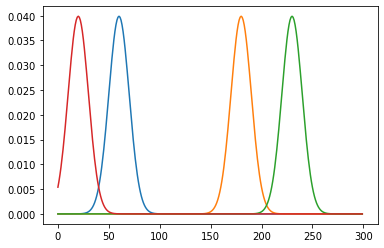

In [65]:
plt.plot(ill2)
#plt.plot(opsin2)

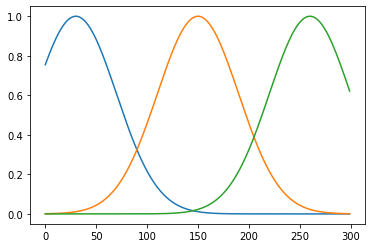

In [66]:
plt.plot(opsin2)

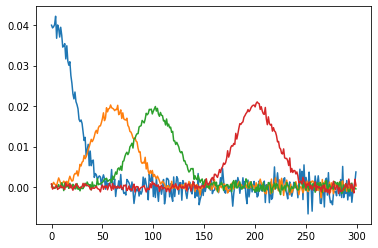

In [67]:
plt.plot(mss.normalized_spectrum)

In [68]:
w, res = pr.fit(
    mss, 
    ill2/20 +  background, 
    background=background, 
    return_res=True, 
)

(3, 4) (3,)
(3, 4) (3,)
(3, 4) (3,)
(3, 4) (3,)
(3, 4) (3,)
(3, 4) (3,)
(3, 4) (3,)
(3, 4) (3,)


In [69]:
print(w)
w.shape

[[4.65519959e-02 3.88298719e-04 3.29707558e-04 3.74339506e-02] [9.15443303e-11 1.72752622e-10 3.04973365e-02 5.93538273e-02] [7.69070374e-03 2.08017703e-11 2.56332855e-12 7.62877217e-02] [5.60162899e-02 1.06963113e-10 4.93004322e-11 3.36318799e-02]] microspectral_E_Q * nanometer


(4, 4)

In [70]:
res[1].fun

array([ 0.05334362, -0.15580718,  0.10247256])

In [71]:
targets, A = pr.get_qs(
    mss, 
    ill2 +  background,  
    background=background, 
)

In [72]:
targets

array([[100.71246787,   8.12625667,   1.00058968],
       [  1.17366095,  60.23029457,  12.54695895],
       [  1.0010101 ,  12.74921095,  59.21069884],
       [125.02076161,   1.53437558,   1.00000333]]) <Unit('dimensionless')>

In [73]:
print(A)

[[127.3655767   92.75751851  34.41158307   0.24411533] [ -1.16551234  10.316136    38.691814    37.23376806] [ -1.83011334   0.44762388   0.90541845  28.97777449]] / microspectral_E_Q / nanometer


In [74]:
xmss = mss.map(w)

/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


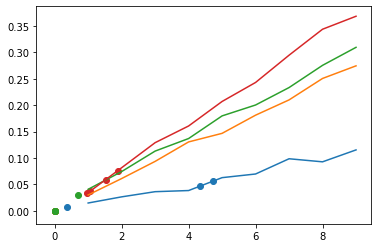

In [75]:
plt.plot(mss.domain, mss)

for ixms, iw in zip(np.squeeze(xmss.T), np.squeeze(w.T)):
    plt.scatter(
        ixms, iw, 
    )